In [1]:
sys.path.insert(1, os.path.abspath('/Users/jonasvvr/Documents/KULeuven/thesis/Soccer-EPV-Framework/LaurieOnTracking/'))

In [2]:
import sklearn.model_selection
import data_handler as dh
import visualization as viz
import spatial_features as spf
import game_state_representation as gsr
import pandas as pd
import numpy as np
import sklearn


In [3]:
FIELD_DIMEN = (105, 68)
DATA_DIR_single = '../bru_data/data/comp-4zwgbb66rif2spcoeeol2motx/tmcl-1qtpbdbeudho5i7fu5z2lp2j8/fx-4sekj9hgwxzq3y4ih9415239w'
DATA_DIR = '../bru_data/data/comp-4zwgbb66rif2spcoeeol2motx/tmcl-1qtpbdbeudho5i7fu5z2lp2j8'

event_data_single = dh.read_event_data(DATA_DIR_single)
# event_data = dh.read_dir_event_data(DATA_DIR)

(<Figure size 1200x800 with 1 Axes>, <AxesSubplot: >)

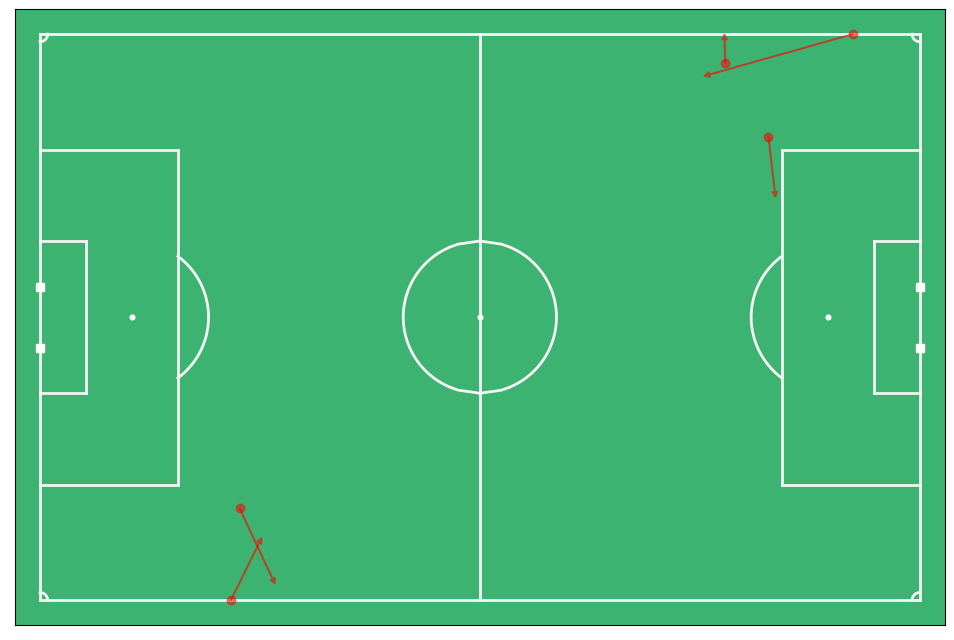

In [4]:
viz.plot_events(event_data_single.iloc[100:110], FIELD_DIMEN)

In [5]:
tracking_single = dh.read_tracking_data(DATA_DIR_single)

(<Figure size 1200x800 with 1 Axes>, <AxesSubplot: >)

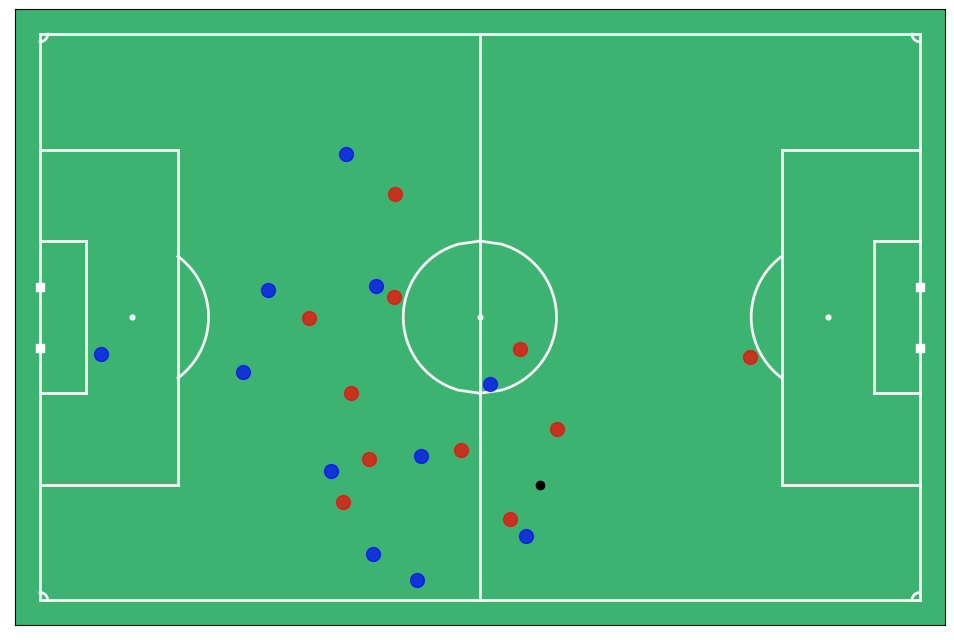

In [6]:
viz.plot_frame(tracking_single.iloc[2316], FIELD_DIMEN)

In [7]:
# passing_events = event_data_single[event_data_single['typeId'] == 1]
# pass_event = passing_events.iloc[119]
#
# match_period = str(pass_event['periodId'])
# timestamp = dh.get_frame(pass_event['timeMin'], pass_event['timeSec'], match_period)
#
# row = tracking_single[(tracking_single['Framecount'] == timestamp) & (tracking_single['Match period'] == match_period)]
# ball_xy = np.array(row['Ball xyz'].iloc[0][:-1])
# ball_carrier = gsr.get_ball_carier(row['Column 5'].iloc[0], ball_xy)
# ball_carrier_xy = np.array([ball_carrier['x'], ball_carrier['y']])
# distance = np.linalg.norm(ball_xy - ball_carrier_xy)
# print(distance)
#
# viz.plot_frame(row.iloc[0], FIELD_DIMEN)

In [8]:
# data = dh.read_event_tracking_data(DATA_DIR, FIELD_DIMEN)
# data.to_pickle('../out/pass_data.pkl')


In [9]:
pass_data = pd.read_pickle('../out/pass_data.pkl')
# pass_data

In [10]:
pass_data_ = pass_data.drop(['Event'], axis=1)
X = pass_data_.iloc[:,:-1]
y = pass_data_.iloc[:,-1]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,
                                                    stratify=y,
                                                    test_size=0.25)


In [11]:
print(len(y_train[y_train == 1]))
print(len(y_train[y_train == 0]))
print(np.mean(y_train))

189
78
0.7078651685393258


In [17]:
%pip install tensorflow-macos

In [13]:
from tensorflow import pad, constant
from keras.layers import Input, Concatenate, Conv2D, MaxPooling2D, UpSampling2D, Lambda
from keras.models import Model
from keras.initializers import Constant
import keras.backend as K

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
from tensorflow import pad, constant
# I couldn't figure out how to do padding with the Keras backend

def symmetric_pad(x):
    paddings = constant([[0, 0], [1, 1], [1, 1], [0, 0]])
    return pad(x, paddings, "SYMMETRIC")